In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense,LSTM,Flatten,ConvLSTM2D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
plt.style.use('dark_background')

In [3]:
df = pd.read_csv('AirPassengers.csv',usecols=[1])
df.head()

,#Passengers
0,112
1,118
2,132
3,129
4,121


In [4]:
df.rename(columns = {'#Passengers':'Passengers'}, inplace = True)
df.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


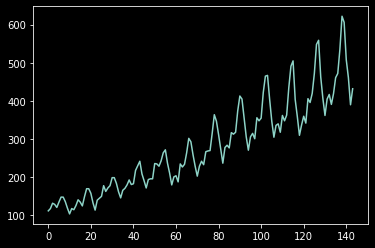

In [5]:
plt.plot(df)

In [6]:
dataset = df.values
dataset = dataset.astype('float32')

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [8]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [9]:
train.shape

(100, 1)

In [10]:
test.shape

(44, 1)

In [11]:
def to_sequences(dataset,seq_size=1):
  x=[]
  y=[]
  for i in range(len(dataset)-seq_size-1):
    window = dataset[i:(i+seq_size),0]
    x.append(window)
    y.append(dataset[i+seq_size,0])

  return np.array(x),np.array(y)

In [12]:
seq_size = 10

In [13]:
trainX,trainY=to_sequences(train,seq_size)
testX,testY=to_sequences(test,seq_size)

In [14]:
print("Shape of training set: {}".format(trainX.shape))

Shape of training set: (89, 10)


In [15]:
print("Shape of test set: {}".format(testX.shape))

Shape of test set: (33, 10)


In [16]:
trainX = trainX.reshape((trainX.shape[0], 1, 1, 1, seq_size))
testX = testX.reshape((testX.shape[0], 1, 1, 1, seq_size))

In [17]:
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,1), activation='relu', input_shape=(1, 1, 1, seq_size)))
model.add(Flatten())
model.add(Dense(32))
model.add(Dense(1))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 1, 1, 64)          19200     
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 21,313
Trainable params: 21,313
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
model.fit(trainX,trainY,verbose=1, epochs=100,validation_data=(testX,testY))

Epoch 1/100
3/3 [==============================] - 31s 232ms/step - loss: 0.0784 - val_loss: 0.3885
Epoch 2/100
3/3 [==============================] - 0s 28ms/step - loss: 0.0544 - val_loss: 0.2936
Epoch 3/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0364 - val_loss: 0.2134
Epoch 4/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0232 - val_loss: 0.1477
Epoch 5/100
3/3 [==============================] - 0s 30ms/step - loss: 0.0140 - val_loss: 0.0973
Epoch 6/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0101 - val_loss: 0.0617
Epoch 7/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0090 - val_loss: 0.0412
Epoch 8/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0094 - val_loss: 0.0328
Epoch 9/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0105 - val_loss: 0.0300
Epoch 10/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0105 - val_loss: 0.0308
Epoch 11/100
3/3 

In [21]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [22]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [23]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 23.00 RMSE


In [24]:
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 49.71 RMSE


In [25]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

In [26]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

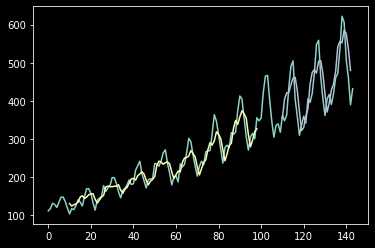

In [27]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()